# Laboratorio05: Modelos de ML para predecir la producción

Objetivos:
Aplicar modelos de regresón para predecir tasas de producción de petróleo/gas.
Analizar factores influyentes en el rendimiento de los pozos.
Comparar el rendimiento de diferentes técnicas de regresión.
Evaluar y comunicar los resultados obtenidos.


In [169]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
# Carga del dataset
df = pd.read_csv('datos_petroleros_completos.csv')
df.head

<bound method NDFrame.head of            fecha    pozo    campo  petroleo_bbl     gas_mscf    agua_bbl  \
0     2022-01-01  POZO-A  CAMPO-A   1259.605698  1491.465814  203.916905   
1     2022-01-02  POZO-A  CAMPO-A   1181.730032  1429.280662  180.654841   
2     2022-01-03  POZO-A  CAMPO-A   1274.368468  1529.871781  208.609894   
3     2022-01-04  POZO-A  CAMPO-A   1377.735865  1658.166842  166.615958   
4     2022-01-05  POZO-A  CAMPO-A   1165.202656  1359.592698  221.473781   
...          ...     ...      ...           ...          ...         ...   
1820  2022-12-27  POZO-E  CAMPO-E    440.849855   291.937633  818.083224   
1821  2022-12-28  POZO-E  CAMPO-E    531.506085   355.327489  819.811081   
1822  2022-12-29  POZO-E  CAMPO-E    617.516104   394.932310  758.630426   
1823  2022-12-30  POZO-E  CAMPO-E    475.409235   364.584376  791.915867   
1824  2022-12-31  POZO-E  CAMPO-E    515.637717   346.543322  693.836803   

      presion_cabezal_psi  presion_linea_psi  temperatura

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   1825 non-null   object 
 1   pozo                    1825 non-null   object 
 2   campo                   1825 non-null   object 
 3   petroleo_bbl            1825 non-null   float64
 4   gas_mscf                1825 non-null   float64
 5   agua_bbl                1825 non-null   float64
 6   presion_cabezal_psi     1825 non-null   float64
 7   presion_linea_psi       1825 non-null   float64
 8   temperatura_c           1825 non-null   float64
 9   choke_percent           1825 non-null   float64
 10  horas_operativas        1825 non-null   float64
 11  liquido_total           1825 non-null   float64
 12  corte_agua              1825 non-null   float64
 13  gas_petroleo_ratio      1825 non-null   float64
 14  produccion_equivalente  1825 non-null   

In [172]:
df.columns

Index(['fecha', 'pozo', 'campo', 'petroleo_bbl', 'gas_mscf', 'agua_bbl',
       'presion_cabezal_psi', 'presion_linea_psi', 'temperatura_c',
       'choke_percent', 'horas_operativas', 'liquido_total', 'corte_agua',
       'gas_petroleo_ratio', 'produccion_equivalente', 'gas_agua_ratio',
       'indice_productividad', 'eficiencia_termica', 'indice_trabajo',
       'prod_por_choke'],
      dtype='object')

In [173]:
# Definición de variables
#Independientes
features = ['petroleo_bbl', 'gas_mscf', 'agua_bbl', 'presion_cabezal_psi', 'presion_linea_psi', 'temperatura_c', 'choke_percent']
# Dependiente
target = 'horas_operativas'

In [174]:
# Subset para evaluar y hacer el modelo
subset = df[features + [target]]

AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

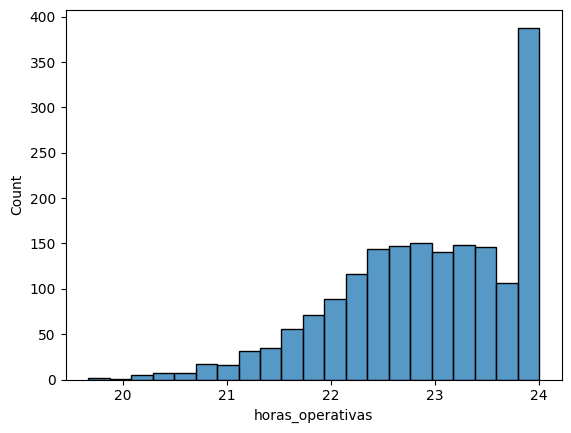

In [175]:
sns.histplot( df[target] )
plt.tittle('Distribución de la producción equivalente')
plt.show()

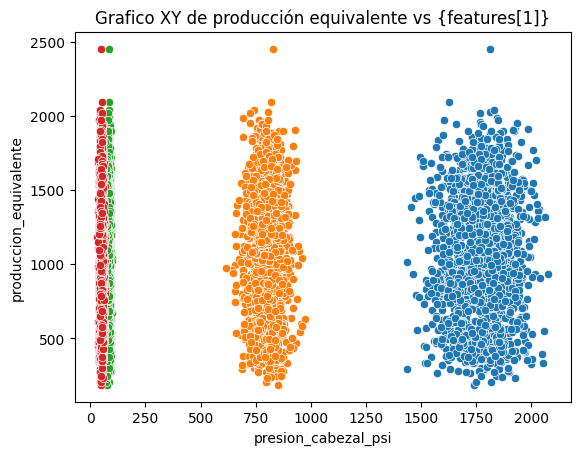

In [ ]:
# diagrama XY (scatterplot)
#
for f in features:
    sns.scatterplot(x= df[f], y=df[target])
    plt.title('Grafico XY de producción equivalente vs {features[1]}')

In [ ]:
prueba = 'ejemplo'
print(f'Grafico XY de producción equivalente vs {prueba}')

Grafico XY de producción equivalente vs ejemplo


In [ ]:
for i in features:
    print(i)
    print('fin de ciclo')

presion_cabezal_psi
fin de ciclo
presion_linea_psi
fin de ciclo
temperatura_c
fin de ciclo
choke_percent
fin de ciclo


<Axes: >

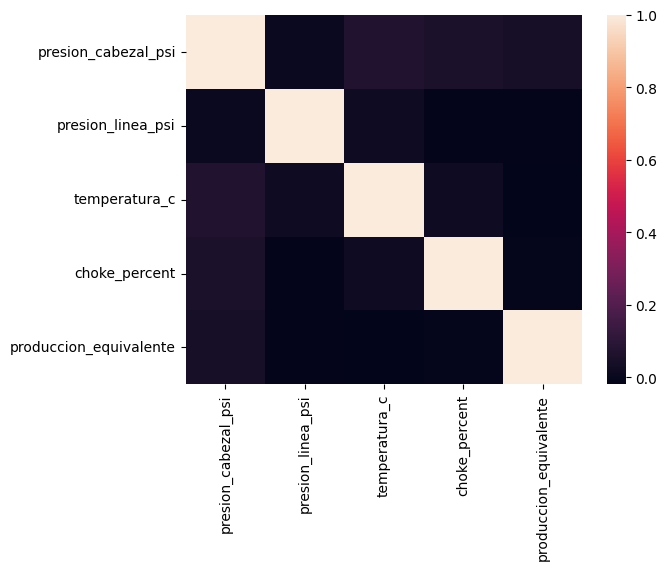

In [ ]:

sns.heatmap( subset.corr())

<Axes: >

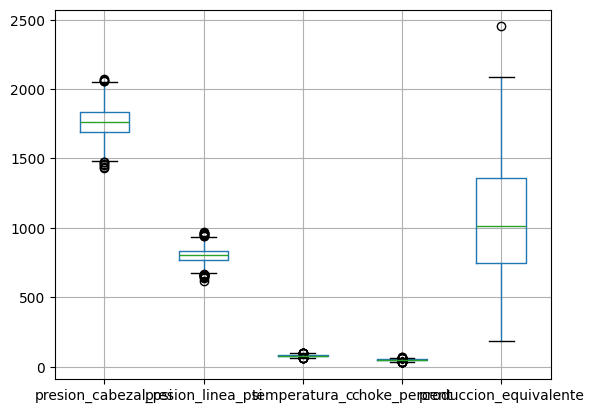

In [ ]:
subset.boxplot()

In [ ]:
# Librería de normalización
from sklearn.preprocessing import StandardScaler

# Activación
scaler = StandardScaler()


X = scaler.fit_transform(df[features])

<Axes: >

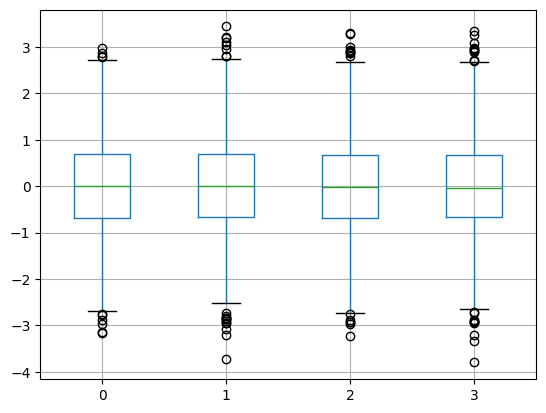

In [ ]:
pd.DataFrame(X).boxplot()

# Escalamiento de variables independientes con StandardScaler

## Partición de datos

In [ ]:
X = df[features]
y = df[target]


In [ ]:
# Librería para partir los datos
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 23)

In [ ]:
X_train_scale = scaler.fit_transform(X_train)

<Axes: >

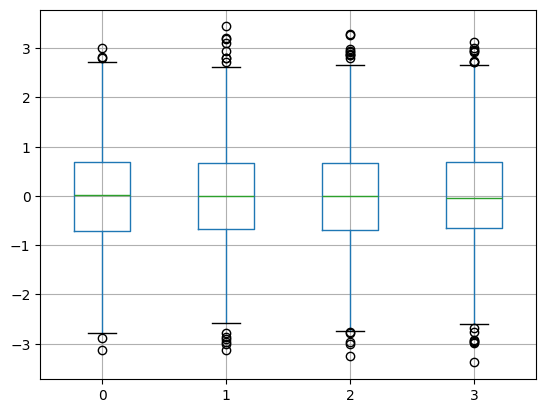

In [ ]:
pd.DataFrame(X_train_scale).boxplot()

In [ ]:
X_test_scale= scaler.transform(X_test)

<Axes: >

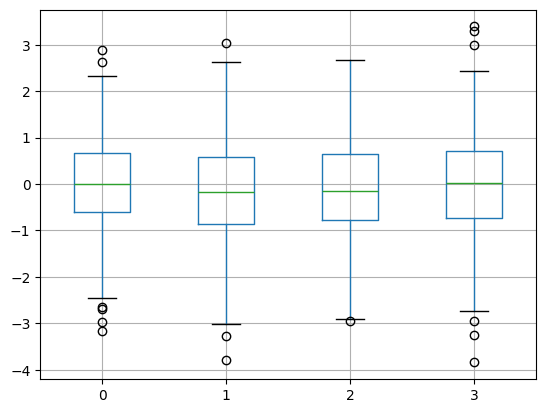

In [ ]:
pd.DataFrame(X_test_scale).boxplot()

# Creación del modelo de RL

In [ ]:
# Carga de lmodelo
from sklearn.linear_model import LinearRegression

In [ ]:
# llamado a clase del modelo seleccionado
model = LinearRegression()
model.fit(X_train_scale, y_train)

LinearRegression()

In [ ]:
# Se valida la parte de predicción
y_predict = model.predict(X_test_scale)

In [ ]:
pd.DataFrame(data={'y_verdadera' : y_test, 'y_prediccion' : y_predict})

,y_verdadera,y_prediccion
444,857.706834,1056.594951
1721,570.972231,1064.492367
1065,868.993890,1056.543354
1507,612.424554,1049.108477
1134,1491.303603,1024.084514
...,...,...
801,1104.515470,1065.635743
131,1200.010939,1072.448141
314,1684.463726,1053.151175
141,1365.413168,1058.322579


## Métricas de evaluación

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_predict)

154605.79169460243

In [ ]:
mean_absolute_error(y_test,y_predict) 

326.11056175502176

In [ ]:
r2_score(y_test,y_predict)

0.004327342798986944

<function matplotlib.pyplot.show(close=None, block=None)>

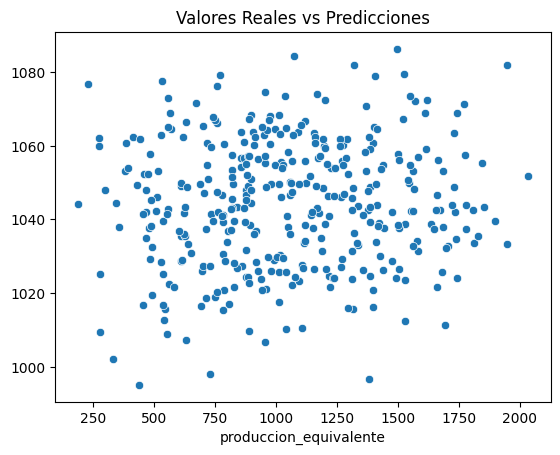

In [ ]:
sns.scatterplot(x=y_test,y= y_predict)
plt.title('Valores Reales vs Predicciones') 
plt.show
